# Import Needed Libraries

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor

import warnings
warnings.filterwarnings('ignore')

# Load Data and take a quick look

In [2]:
dataset = pd.read_csv('gld_price_data.csv')
dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
# check info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [4]:
# check nulls
dataset.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

# Explore Data

array([[<AxesSubplot:title={'center':'SPX'}>,
        <AxesSubplot:title={'center':'GLD'}>],
       [<AxesSubplot:title={'center':'USO'}>,
        <AxesSubplot:title={'center':'SLV'}>],
       [<AxesSubplot:title={'center':'EUR/USD'}>, <AxesSubplot:>]],
      dtype=object)

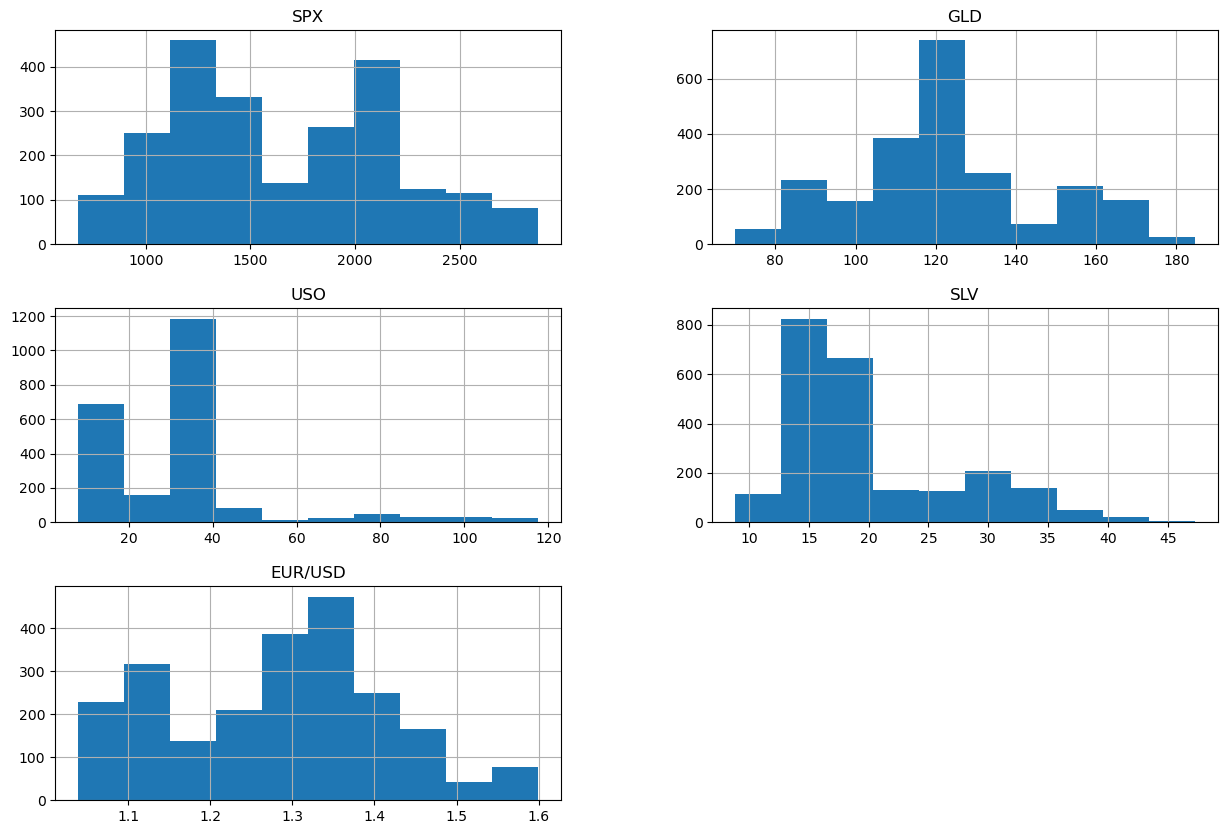

In [5]:
# visualize data
dataset.hist(figsize=(15, 10))

In [6]:
# check 'Date'
print("Total values in Data is: ", dataset['Date'].count())
print("========================================")
dataset['Date'].value_counts()

Total values in Data is:  2290


1/2/2008      1
12/15/2014    1
12/5/2014     1
12/8/2014     1
12/9/2014     1
             ..
6/14/2011     1
6/13/2011     1
6/9/2011      1
6/8/2011      1
5/16/2018     1
Name: Date, Length: 2290, dtype: int64

### Look for corrleations

In [7]:
# check correlations
correlation = dataset.corr()
correlation['GLD'].sort_values(ascending = False)

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64

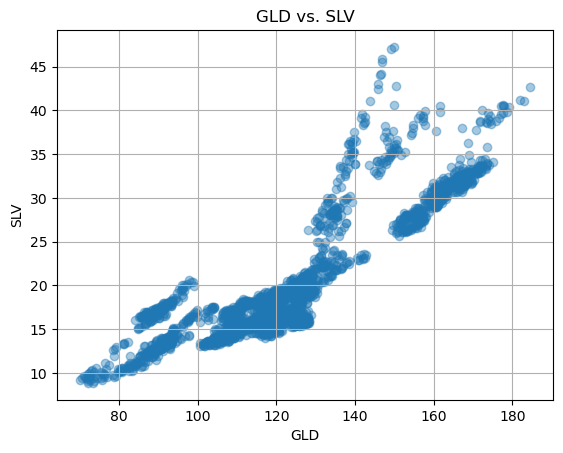

In [8]:
# # visualize correlation between 'GLD' and 'SLV'
plt.scatter(dataset['GLD'], dataset['SLV'], alpha=0.4)
plt.title("GLD vs. SLV")
plt.xlabel("GLD")
plt.ylabel("SLV")
plt.grid()
plt.show()

C:\Users\Rana Ahmed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


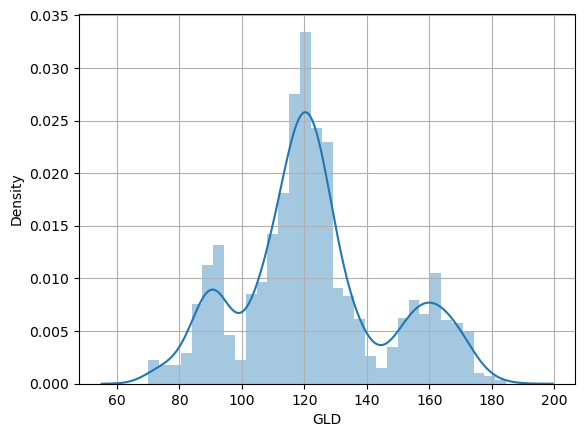

In [9]:
# check distribution for 'GLD'
sns.distplot(dataset['GLD'])
plt.grid()

In [10]:
# create 'Year' column from 'Date' column
dataset['Year'] = pd.DatetimeIndex(dataset['Date']).year 
dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD,Year
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692,2008
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491,2008
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492,2008
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299,2008
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099,2008


In [11]:
# make copy of dataset
dataset_2 = dataset.copy()
dataset_2.head()

,Date,SPX,GLD,USO,SLV,EUR/USD,Year
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692,2008
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491,2008
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492,2008
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299,2008
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099,2008


In [12]:
dataset_2 = dataset_2.drop(['Date'], axis=1)

In [13]:
dataset_2.head()

,SPX,GLD,USO,SLV,EUR/USD,Year
0,1447.160034,84.860001,78.470001,15.180,1.471692,2008
1,1447.160034,85.570000,78.370003,15.285,1.474491,2008
2,1411.630005,85.129997,77.309998,15.167,1.475492,2008
3,1416.180054,84.769997,75.500000,15.053,1.468299,2008
4,1390.189941,86.779999,76.059998,15.590,1.557099,2008


In [14]:
# check info
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
 5   Year     2290 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 107.5 KB


<Figure size 800x500 with 0 Axes>

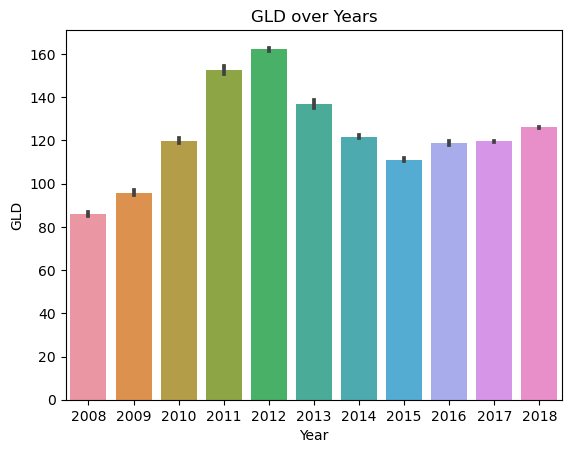

<Figure size 800x500 with 0 Axes>

In [34]:
# check distribution of 'GLD' over 'Year'
plt.title('GLD over Years')
sns.barplot(x='Year', y='GLD', data=dataset_2);
plt.figure(figsize=(8,5))

# Split data into Training and Testing 


In [36]:
X = dataset_2.drop(['GLD'], axis=1)
y = dataset_2['GLD']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [49]:
print("X_train shape is: ", X_train.shape)
print("y_train shape is: ", y_train.shape)
print("============================")
print("X_test shape is: ", X_test.shape)
print("y_test shape is: ", y_test.shape)

X_train shape is:  (1832, 5)
y_train shape is:  (1832,)
X_test shape is:  (458, 5)
y_test shape is:  (458,)


# Feature Scaling

In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [57]:
X_train_scaled

array([[-0.95609688,  0.39284935, -0.49687641,  0.55383436, -0.92118728],
       [-0.5997591 ,  2.23547396, -0.44710215,  1.3893986 , -1.58994698],
       [ 0.73887815, -1.06726735, -0.99461906, -1.47472469,  0.75071197],
       ...,
       [-0.72839904,  0.21299444,  2.01587542,  1.08345574, -0.58680743],
       [-0.85458184,  0.17195731,  1.72741135,  0.774552  , -0.58680743],
       [ 0.8076188 , -0.64372206, -0.73726349, -1.35485789,  0.75071197]])

In [58]:
X_test_scaled

array([[ 0.11605221,  0.26278993,  0.14102074,  0.523242  ,  0.13183665],
       [ 1.50696619, -1.2202437 , -0.69490532, -1.09133604,  1.46622745],
       [-0.61116138,  0.54048933,  2.25386209,  0.98870237, -0.53535876],
       ...,
       [-0.80056233,  0.07103224,  1.43189153,  0.71924777, -0.53535876],
       [-1.02912284,  0.1478428 , -0.34043904, -0.00855467, -0.86895646],
       [ 0.60866919, -0.9162245 , -0.83445892, -1.23599719,  0.79903205]])

# Model

### LinearRegression

In [120]:
LinearRegression = LinearRegression
LinearRegression.fit(X_train_scaled, y_train)

y_train_pred = LinearRegression.predict(X_train_scaled)
y_test_pred = LinearRegression.predict(X_test_scaled)

LinearRegression_RMSE_train = np.sqrt(mean_squared_error(y_train_pred, y_train))
LinearRegression_RMSE_test = np.sqrt(mean_squared_error(y_test_pred, y_test,))

print("RMSE for LinearRegression train is: ", LinearRegression_RMSE_train)
print("RMSE for LinearRegression test is: ", LinearRegression_RMSE_test)

R2_score_LinearRegression = r2_score(y_test_pred, y_test)*100
print("R2_score for LinearRegression model is: ", R2_score_LinearRegression, "%")

RMSE for LinearRegression train is:  7.164790026238964
RMSE for LinearRegression test is:  7.944779827145132
R2_score for LinearRegression model is:  87.3497498311421 %


### Decision Tree Regressor

In [121]:
DecisionTree = DecisionTreeRegressor()
DecisionTree.fit(X_train_scaled, y_train)

y_train_pred_DecisionTree = DecisionTree.predict(X_train_scaled)
y_test_pred_DecisionTree = DecisionTree.predict(X_test_scaled)

DecisionTree_RMSE_train = np.sqrt(mean_squared_error(y_train_pred_DecisionTree, y_train))
DecisionTree_RMSE_test = np.sqrt(mean_squared_error(y_test_pred_DecisionTree, y_test,))

print("RMSE for DecisionTree train is: ", DecisionTree_RMSE_train)
print("RMSE for DecisionTree test is: ", DecisionTree_RMSE_test)

R2_score_DecisionTree = r2_score(y_test_pred_DecisionTree, y_test)*100
print("R2_score for DecisionTree model is: ", R2_score_DecisionTree, "%")

RMSE for DecisionTree train is:  0.0
RMSE for DecisionTree test is:  3.129193488412223
R2_score for DecisionTree model is:  98.0914154408101 %


### Random Forest Regressor

In [122]:
RandomForest = RandomForestRegressor()
RandomForest.fit(X_train_scaled, y_train)

y_train_pred_RandomForest = RandomForest.predict(X_train_scaled)
y_test_pred_RandomForest = RandomForest.predict(X_test_scaled)

RandomForest_RMSE_train = np.sqrt(mean_squared_error(y_train_pred_RandomForest, y_train))
RandomForest_RMSE_test = np.sqrt(mean_squared_error(y_test_pred_RandomForest, y_test,))

print("RMSE for RandomForest train is: ", RandomForest_RMSE_train)
print("RMSE for RandomForest test is: ", RandomForest_RMSE_test)

R2_score_RandomForest = r2_score(y_test_pred_RandomForest, y_test)*100
print("R2_score for RandomForest model is: ", R2_score_RandomForest, "%")

RMSE for RandomForest train is:  0.8470609741167262
RMSE for RandomForest test is:  2.1653034114661653
R2_score for RandomForest model is:  99.06322330526417 %


### SVR

In [123]:
svr = SVR()
svr.fit(X_train_scaled, y_train)

y_train_pred_svr = svr.predict(X_train_scaled)
y_test_pred_svr = svr.predict(X_test_scaled)

svr_RMSE_train = np.sqrt(mean_squared_error(y_train_pred_svr, y_train))
svr_RMSE_test = np.sqrt(mean_squared_error(y_test_pred_svr, y_test,))

print("RMSE for SVR train is: ", svr_RMSE_train)
print("RMSE for SVR test is: ", svr_RMSE_test)

R2_score_svr = r2_score(y_test_pred_svr, y_test)*100
print("R2_score for SVR model is: ", R2_score_svr, "%")

RMSE for SVR train is:  5.1566497875170825
RMSE for SVR test is:  5.682447416893736
R2_score for SVR model is:  93.34757332515524 %


### KNeighbors Regressor

In [124]:
KNeighbors = KNeighborsRegressor()
KNeighbors.fit(X_train_scaled, y_train)

y_train_pred_KNeighbors = KNeighbors.predict(X_train_scaled)
y_test_pred_KNeighbors = KNeighbors.predict(X_test_scaled)

KNeighbors_RMSE_train = np.sqrt(mean_squared_error(y_train_pred_KNeighbors, y_train))
KNeighbors_RMSE_test = np.sqrt(mean_squared_error(y_test_pred_KNeighbors, y_test,))

print("RMSE for KNeighborsRegressor train is: ", KNeighbors_RMSE_train)
print("RMSE for KNeighborsRegressor test is: ", KNeighbors_RMSE_test)

R2_score_KNeighbors = r2_score(y_test_pred_KNeighbors, y_test)*100
print("R2_score for KNeighborsRegressor model is: ", R2_score_KNeighbors, "%")

RMSE for KNeighborsRegressor train is:  1.5188449259034875
RMSE for KNeighborsRegressor test is:  1.96249081346559
R2_score for KNeighborsRegressor model is:  99.24181562231989 %


### Gradient Boosting Regressor

In [125]:
GradientBoosting = GradientBoostingRegressor()
GradientBoosting.fit(X_train_scaled, y_train)

y_train_pred_GradientBoosting = GradientBoosting.predict(X_train_scaled)
y_test_pred_GradientBoosting = GradientBoosting.predict(X_test_scaled)

GradientBoosting_RMSE_train = np.sqrt(mean_squared_error(y_train_pred_GradientBoosting, y_train))
GradientBoosting_RMSE_test = np.sqrt(mean_squared_error(y_test_pred_GradientBoosting, y_test,))

print("RMSE for GradientBoostingRegressor train is: ", GradientBoosting_RMSE_train)
print("RMSE for GradientBoostingRegressor test is: ", GradientBoosting_RMSE_test)

R2_score_GradientBoosting = r2_score(y_test_pred_GradientBoosting, y_test)*100
print("R2_score for GradientBoostingRegressor model is: ", R2_score_GradientBoosting, "%")

RMSE for GradientBoostingRegressor train is:  2.156600582978391
RMSE for GradientBoostingRegressor test is:  2.750199548593491
R2_score for GradientBoostingRegressor model is:  98.49658350273293 %


### Bagging

In [126]:
Bagging = BaggingRegressor()
Bagging.fit(X_train_scaled, y_train)

y_train_pred_Bagging = Bagging.predict(X_train_scaled)
y_test_pred_Bagging = Bagging.predict(X_test_scaled)

Bagging_RMSE_train = np.sqrt(mean_squared_error(y_train_pred_Bagging, y_train))
Bagging_RMSE_test = np.sqrt(mean_squared_error(y_test_pred_Bagging, y_test,))

print("RMSE for BaggingRegressor train is: ", Bagging_RMSE_train)
print("RMSE for BaggingRegressor test is: ", Bagging_RMSE_test)

R2_score_Bagging = r2_score(y_test_pred_Bagging, y_test)*100
print("R2_score for BaggingRegressor model is: ", R2_score_Bagging, "%")

RMSE for BaggingRegressor train is:  0.9638636520238096
RMSE for BaggingRegressor test is:  2.141955466234997
R2_score for BaggingRegressor model is:  99.0758914138433 %


### XGB Regressor

In [127]:
XGB = XGBRegressor()
XGB.fit(X_train_scaled, y_train)

y_train_pred_XGB = XGB.predict(X_train_scaled)
y_test_pred_XGB = XGB.predict(X_test_scaled)

XGB_RMSE_train = np.sqrt(mean_squared_error(y_train_pred_XGB, y_train))
XGB_RMSE_test = np.sqrt(mean_squared_error(y_test_pred_XGB, y_test,))

print("RMSE for XGBRegressor train is: ", XGB_RMSE_train)
print("RMSE for XGBRegressor test is: ", XGB_RMSE_test)

R2_score_XGB = r2_score(y_test_pred_XGB, y_test)*100
print("R2_score for XGBRegressor model is: ", R2_score_XGB, "%")

RMSE for XGBRegressor train is:  0.41861800266827576
RMSE for XGBRegressor test is:  2.6222156463013624
R2_score for XGBRegressor model is:  98.64428613300836 %


### RANSAC Regressor

In [130]:
RANSAC = RANSACRegressor(base_estimator=LinearRegression, max_trials=100)
RANSAC.fit(X_train_scaled, y_train)

y_train_pred_RANSAC = RANSAC.predict(X_train_scaled)
y_test_pred_RANSAC = RANSAC.predict(X_test_scaled)

RANSAC_RMSE_train = np.sqrt(mean_squared_error(y_train_pred_RANSAC, y_train))
RANSAC_RMSE_test = np.sqrt(mean_squared_error(y_test_pred_RANSAC, y_test,))

print("RMSE for RANSACRegressor train is: ", RANSAC_RMSE_train)
print("RMSE for RANSACRegressor test is: ", RANSAC_RMSE_test)

R2_score_RANSAC = r2_score(y_test_pred_RANSAC, y_test)*100
print("R2_score for RANSACRegressor model is: ", R2_score_RANSAC, "%")

RMSE for RANSACRegressor train is:  9.030593018711954
RMSE for RANSACRegressor test is:  10.426239387214842
R2_score for RANSACRegressor model is:  84.44566729087497 %


### Stochastic Gradient Descent

In [131]:
SGD = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
SGD.fit(X_train_scaled, y_train)

y_train_pred_SGD = SGD.predict(X_train_scaled)
y_test_pred_SGD = SGD.predict(X_test_scaled)

SGD_RMSE_train = np.sqrt(mean_squared_error(y_train_pred_SGD, y_train))
SGD_RMSE_test = np.sqrt(mean_squared_error(y_test_pred_SGD, y_test,))

print("RMSE for SGDRegressor train is: ", SGD_RMSE_train)
print("RMSE for SGDRegressor test is: ", SGD_RMSE_test)

R2_score_SGD = r2_score(y_test_pred_SGD, y_test)*100
print("R2_score for SGDRegressor model is: ", R2_score_SGD, "%")

RMSE for SGDRegressor train is:  7.529301084928025
RMSE for SGDRegressor test is:  8.355733445445372
R2_score for SGDRegressor model is:  85.76232564638461 %


In [137]:
# create dataframe for R2_score
data = {'Models' : 
       ['LinearRegression', 'DecisionTree', 'RandomForest', 'SVR', 'KNeighbors', 'GradientBoosting', 
       'Bagging', 'XGP', 'RANSAC', 'SGD'],
       'R2_score' : [R2_score_LinearRegression, R2_score_DecisionTree, R2_score_RandomForest, 
                    R2_score_svr, R2_score_KNeighbors, R2_score_GradientBoosting, R2_score_Bagging,
                    R2_score_XGB, R2_score_RANSAC, R2_score_SGD]
       }
df = pd.DataFrame(data)
df

,Models,R2_score
0,LinearRegression,87.349750
1,DecisionTree,98.091415
2,RandomForest,99.063223
3,SVR,93.347573
4,KNeighbors,99.241816
5,GradientBoosting,98.496584
6,Bagging,99.075891
7,XGP,98.644286
8,RANSAC,84.445667
9,SGD,85.762326
